# 解答例 第３回
1. 指数増殖，ロジスティック成長モデルを解析的に解け．
2. ロジスティック成長モデルについて１．で求めた解析解とオイラー法により近似した数値解を一つの図にプロットせよ．（その際のパラメータや初期値も示すこと）
3. 2．の図について，時間方向の刻み幅⊿tを様々に変化させ，その影響を考察せよ．
4. 質問，意見，要望等をどうぞ．

課題２と３についての解答例を示す．

## 課題２
ロジスティック成長モデル
$$
\frac{dx}{dt} = r \left(1-\frac{x}{K}\right)x
$$
の解析解は
$$
x(t) = \frac{K}{1+\left(\frac{K}{x_0}-1\right)e^{-rt}}
$$
であった．

In [2]:
%matplotlib inline

In [3]:
import math
import matplotlib.pyplot as plt

In [4]:
r = 0.2
K = 100

x0 = 10

tEnd = 100

#
# 時間幅
#
# 解析解用
dtA = 1
iEndA = int(tEnd/dtA)+1

# 数値解用
# dtNを0.1~0.001の範囲で変えて，どの程度解析解と合うか検討してみる
dtN = 0.2
iEndN = int(tEnd/dtN)

#
# メイン
#
# 解析解
tListA = []
xListA = []
for i in range(iEndA):
    t = dtA*i
    x = K/(1+(K/x0-1)*math.exp(-r*t))
    tListA.append(t)
    xListA.append(x)

# 数値解
t = 0
x = x0
xListN = [x]
tListN = [t]
for i in range(iEndN):
    t = dtN*(i+1)
    xx = x + r*(1-x/K)*x*dtN
    x = xx
    tListN.append(t)
    xListN.append(x)

r:  0.2 , K:  100 , x0:  10


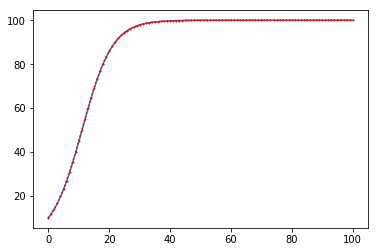

In [7]:
print("r: ", r, ", K: ", K, ", x0: ", x0)
plt.plot(tListN, xListN)
plt.plot(tListA, xListA, "r.:", markersize=2)

## 課題3

In [31]:
r = 0.9
K = 1000

x0 = 10

tEnd = 30

#
# 時間幅
#
# 解析解用
dtA = 1
iEndA = int(tEnd/dtA)+1

# 数値解用
dtNList = [5, 4, 3, 2, 1, 0.5, 0.1, 0.01]

#
# メイン
#
# 解析解
tListA = []
xListA = []
for i in range(iEndA):
    t = dtA*i
    x = K/(1+(K/x0-1)*math.exp(-r*t))
    tListA.append(t)
    xListA.append(x)

# 数値解
xListNList = []
tListNList = []
for dtN in dtNList:
    t = 0
    x = x0
    xListN = [x]
    tListN = [t]
    iEndN = int(tEnd/dtN)
    for i in range(iEndN):
        t = dtN*(i+1)
        xx = x + r*(1-x/K)*x*dtN
        x = xx
        tListN.append(t)
        xListN.append(x)
    tListNList.append(tListN)
    xListNList.append(xListN)

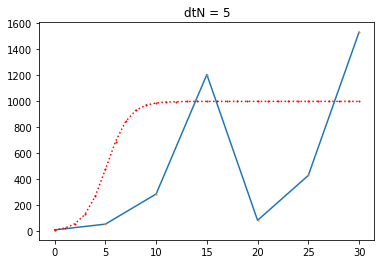

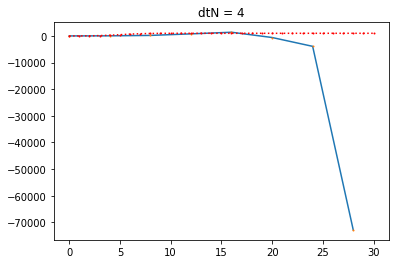

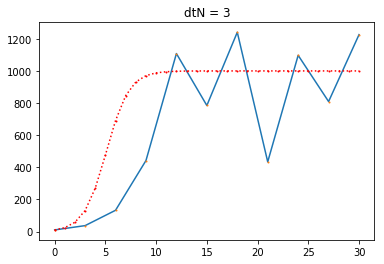

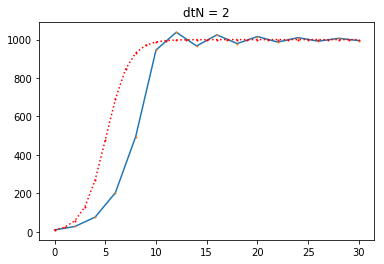

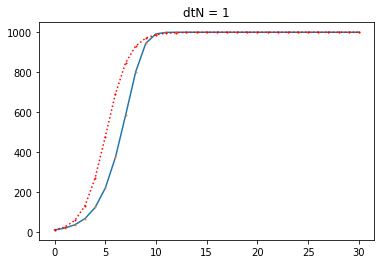

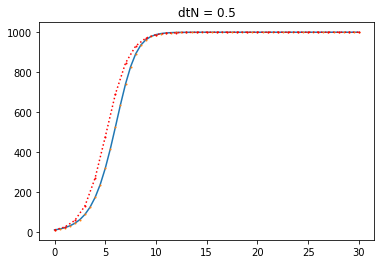

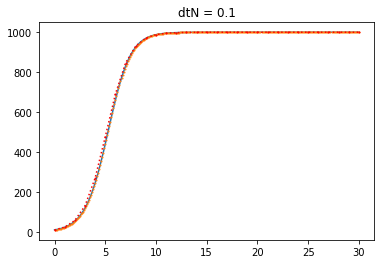

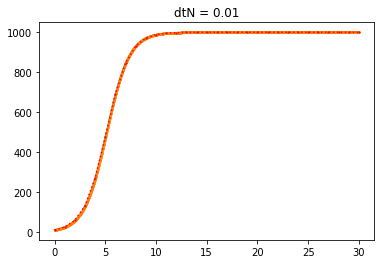

In [32]:
for i in range(len(dtNList)):
    plt.plot(tListNList[i], xListNList[i], tListNList[i], xListNList[i], ".", markersize=2)
    plt.plot(tListA, xListA, "r.:", markersize=2)
    plt.title("dtN = "+str(dtNList[i]))
    plt.show()